#Method 1 使用Pandas linking to Yahoo下載Data

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
#plot in cell
%matplotlib inline 
from pandas.util.testing import assert_frame_equal


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import sys


### Get data from yahoo.finance

In [ ]:
tickers = ['PG','^GSPC']
data0 = pdr.get_data_yahoo(tickers, '2013-01-01')['Adj Close']
#gspc = pdr.get_data_yahoo('^GSPC', '2013-01-01')

data0.head()

Symbols,PG,^GSPC
Date,,
2013-01-02,54.048584,1462.420044
2013-01-03,53.705868,1459.369995
2013-01-04,53.814930,1466.469971
2013-01-07,53.448818,1461.890015
2013-01-08,53.363163,1457.150024


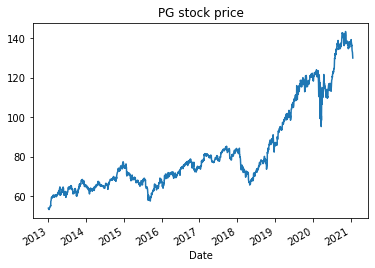

In [ ]:
data0.PG.plot(title="PG stock price")

In [ ]:
data0r=data0.pct_change()
data0r.describe()
sec_returns1 = np.log(data0/data0.shift(1))
sec_returns1.describe()
print(data0r.head())
print(sec_returns1.head())
%whos


Symbols           PG     ^GSPC
Date                          
2013-01-02       NaN       NaN
2013-01-03 -0.006341 -0.002086
2013-01-04  0.002031  0.004865
2013-01-07 -0.006803 -0.003123
2013-01-08 -0.001603 -0.003242
Symbols           PG     ^GSPC
Date                          
2013-01-02       NaN       NaN
2013-01-03 -0.006361 -0.002088
2013-01-04  0.002029  0.004853
2013-01-07 -0.006826 -0.003128
2013-01-08 -0.001604 -0.003248
Variable             Type               Data/Info
-------------------------------------------------
YahooFinancials      type               <class 'yahoofinancials.YahooFinancials'>
assert_frame_equal   function           <function assert_frame_equal at 0x7fef06563730>
assets               list               n=2
data                 dict               n=2
data0                DataFrame          Symbols             PG   <...>\n[2030 rows x 2 columns]
data0r               DataFrame          Symbols           PG     <...>\n[2030 rows x 2 columns]
df              

In [ ]:
import inspect
print(inspect.getfile(pd))
import os, sys
sys.path.append('/usr/local/lib/python3.6/dist-packages/panda')
import usr.local.lib.python3.6.dist-packages.pandas

SyntaxError: ignored

# Method 2b *Yahoo* Financials

In [ ]:
!pip install yahoofinancials #Yahoo Finance python API


  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-cp36-none-any.whl size=15192 sha256=89420bf4dbdd4de6cf0f3cb6529eb29b081f4030499e0be01a3ad618d47a6ec9
  Stored in directory: /root/.cache/pip/wheels/d9/7e/cf/4977a8572d5247242a4b13018d1d36923024ba84236e0d28bc
Successfully built yahoofinancials


In [ ]:
import pandas as pd
from yahoofinancials import YahooFinancials
#one stock
#yahoo_financials = YahooFinancials('^GSPC')
yahoo_financials = YahooFinancials('PG')

In [ ]:
#data3 = yahoo_financials.get_historical_price_data(start_date='2013-01-01',                                        
#                                                  end_date='2021-01-22',
#                                                time_intervals='daily')
data = yahoo_financials.get_historical_price_data(start_date='2013-01-01', 
                                                  end_date='2021-01-22', 
                                                  time_interval='daily')
#tsla_df = pd.DataFrame(data['TSLA']['prices'])
#tsla_df = tsla_df.drop('date', axis=1).set_index('formatted_date')

#tsla_df.head()



In [ ]:
data # lists in lists ; levels in levels

In [ ]:
list(data['PG'])

['eventsData',
 'firstTradeDate',
 'currency',
 'instrumentType',
 'timeZone',
 'prices']

In [ ]:
list(data['PG']['prices'])

In [ ]:

list(data['PG']['prices'][0])


['date',
 'high',
 'low',
 'open',
 'close',
 'volume',
 'adjclose',
 'formatted_date']

In [ ]:
list(data['PG']['prices'][0])

In [ ]:
#for item in data['incomeStatementHistory']['AAPL']:
 #   for key, val in item.items():
  #      print(key, val['ebit'])
#data['^GSPC']['adjclose']
gpdf=pd.DataFrame(data['PG']['prices'])
gpdf.drop('date', axis=1).set_index('formatted_date')
gpdf.head()
#pd.DataFrame(data)['PG']
#import json
#print(json.dumps(data, sort_keys=True, indent=4))

#pp = pprint.PrettyPrinter(indent=4)
#pp.pprint(df) # df in your case  
     
     
     




,date,high,low,open,close,volume,adjclose,formatted_date
0,1357137000,69.389999,68.349998,68.650002,69.389999,9987000,54.048584,2013-01-02
1,1357223400,69.500000,68.940002,69.440002,68.949997,7741900,53.705868,2013-01-03
2,1357309800,69.169998,68.680000,69.010002,69.089996,5853700,53.814930,2013-01-04
3,1357569000,68.919998,68.379997,68.919998,68.620003,5269800,53.448818,2013-01-07
4,1357655400,68.730003,68.400002,68.519997,68.510002,7362000,53.363163,2013-01-08


In [ ]:
# two stocks
assets = ['^GSPC', 'PG']

In [ ]:
yahoo_financials = YahooFinancials(assets)

In [ ]:
data = yahoo_financials.get_historical_price_data(start_date='2013-01-01', 
                                                  end_date='2021-01-21', 
                                                  time_interval='daily')

In [ ]:
data

In [ ]:
prices_df = pd.DataFrame({
    a: {x['formatted_date']: x['adjclose'] for x in data[a]['prices']} for a in assets
})

In [ ]:
data3=prices_df
sec_returns1 = np.log(data3/data3.shift(1))
sec_returns1.describe()

,^GSPC,PG
count,2026.000000,2026.000000
mean,0.000478,0.000437
std,0.010799,0.011467
min,-0.127652,-0.091428
25%,-0.003137,-0.004707
50%,0.000695,0.000583
75%,0.005188,0.005776
max,0.089683,0.113409


In [ ]:
yahoo_financials.get_stock_quote_type_data()



{'PG': {'exchange': 'NYQ',
  'exchangeTimezoneName': 'America/New_York',
  'exchangeTimezoneShortName': 'EST',
  'gmtOffSetMilliseconds': '-18000000',
  'isEsgPopulated': False,
  'longName': 'The Procter & Gamble Company',
  'market': 'us_market',
  'messageBoardId': 'finmb_33328',
  'quoteType': 'EQUITY',
  'shortName': 'Procter & Gamble Company (The)',
  'symbol': 'PG'},
 '^GSPC': {'exchange': 'SNP',
  'exchangeTimezoneName': 'America/New_York',
  'exchangeTimezoneShortName': 'EST',
  'gmtOffSetMilliseconds': '-18000000',
  'isEsgPopulated': False,
  'market': 'us_market',
  'messageBoardId': 'finmb_INDEXGSPC',
  'quoteType': 'INDEX',
  'shortName': 'S&P 500',
  'symbol': '^GSPC'}}

In [ ]:
yahoo_financials.get_summary_data()

In [ ]:
#these two methods return many of the statistics (such as the beta, price-to-book ratio, etc.)

yahoo_financials.get_key_statistics_data()
#yahoo_financials.get_summary_data()  
#— returns information on earnings (yearly and quarterly) as well as the next date when the company will report the earnings:


{'PG': {'52WeekChange': 0.022022963,
  'SandP52WeekChange': 0.1675049,
  'annualHoldingsTurnover': None,
  'annualReportExpenseRatio': None,
  'beta': 0.41302,
  'beta3Year': None,
  'bookValue': 19.207,
  'category': None,
  'dateShortInterest': 1611878400,
  'earningsQuarterlyGrowth': 0.037,
  'enterpriseToEbitda': 16.154,
  'enterpriseToRevenue': 4.543,
  'enterpriseValue': 336035184640,
  'fiveYearAverageReturn': None,
  'floatShares': 2459693446,
  'forwardEps': 6.06,
  'forwardPE': 21.059406,
  'fundFamily': None,
  'fundInceptionDate': '-',
  'heldPercentInsiders': 0.00106,
  'heldPercentInstitutions': 0.66115,
  'impliedSharesOutstanding': 2469449984,
  'lastCapGain': None,
  'lastDividendDate': '2021-01-21',
  'lastDividendValue': 0.791,
  'lastFiscalYearEnd': 1593475200,
  'lastSplitDate': '2004-06-21',
  'lastSplitFactor': '2:1',
  'legalType': None,
  'maxAge': 1,
  'morningStarOverallRating': None,
  'morningStarRiskRating': None,
  'mostRecentQuarter': 1609372800,
  'netI

In [ ]:
yahoo_financials.get_stock_earnings_data()


{'PG': {'earningsData': {'currentQuarterEstimate': 1.19,
   'currentQuarterEstimateDate': '1Q',
   'currentQuarterEstimateYear': 2021,
   'earningsDate': [{'fmt': '2021-04-20', 'raw': 1618876800}],
   'quarterly': [{'actual': 1.17, 'date': '1Q2020', 'estimate': 1.13},
    {'actual': 1.16, 'date': '2Q2020', 'estimate': 1.01},
    {'actual': 1.63, 'date': '3Q2020', 'estimate': 1.42},
    {'actual': 1.64, 'date': '4Q2020', 'estimate': 1.51}]},
  'financialCurrency': 'USD',
  'financialsData': {'quarterly': [{'date': '1Q2020',
     'earnings': 2917000000,
     'revenue': 17214000000},
    {'date': '2Q2020', 'earnings': 2800000000, 'revenue': 17698000000},
    {'date': '3Q2020', 'earnings': 4277000000, 'revenue': 19318000000},
    {'date': '4Q2020', 'earnings': 3854000000, 'revenue': 19745000000}],
   'yearly': [{'date': 2017, 'earnings': 15326000000, 'revenue': 65058000000},
    {'date': 2018, 'earnings': 9750000000, 'revenue': 66832000000},
    {'date': 2019, 'earnings': 3897000000, 'reve

#Method 2c Yfinance

In [ ]:
!pip install yfinance #Yahoo Finance python API
import yfinance as yf
import time



     |████████████████████████████████| 5.5MB 8.3MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=73329f5429ea25363317f80f5d6ff26bfb6fa40fcf9d7be48565c3834750e977
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
#for beta of P&G
tickers = ['PG','^GSPC']

data1 = pd.DataFrame()

for t in tickers :
    data1[t] = yf.download(t, start = '2013-01-01',auto_adjust =False)['Adj Close']

#can set auto_adjust = True , so all the presented prices are adjusted for potential corporate actions, such as splits.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
tsla_df = yf.download('TSLA', 
                      start='2019-01-01', 
                      end='2019-12-31', 
                      progress=False)
tsla_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,61.220001,63.026001,59.759998,62.023998,62.023998,58293000
2019-01-03,61.400002,61.880001,59.476002,60.071999,60.071999,34826000
2019-01-04,61.200001,63.599998,60.546001,63.537998,63.537998,36970500
2019-01-07,64.344002,67.348000,63.549999,66.991997,66.991997,37756000
2019-01-08,68.391998,68.802002,65.403999,67.070000,67.070000,35042500


In [ ]:
#list 股票sin Web
import pandas as pd

# 貼上連結
url = 'https://finance.yahoo.com/screener/predefined/most_actives?count=100&offset=0'
data = pd.read_html(url)[0]

# 欄位『Symbol』就是股票代碼
stk_list = data.Symbol
stk_list

0      GME
1     PLTR
2      NIO
3        F
4       BB
      ... 
95     CLF
96    CRSR
97     CRM
98    PINS
99     IBN
Name: Symbol, Length: 100, dtype: object

In [ ]:
!pip install requests

### SP500股票stock code

In [ ]:
#stock codes
#!pip install requests
import requests
import pandas as pd
# 貼上連結
url = 'https://www.slickcharts.com/sp500'
headers = {"User-Agent" : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36'}

request = requests.get(url, headers = headers)

data = pd.read_html(request.text)[0]

# 欄位『Symbol』就是股票代碼
stk_list = data.Symbol

# 用 replace 將符號進行替換
stk_list = data.Symbol.apply(lambda x: x.replace('.', '-'))
stk_list

0      AAPL
1      MSFT
2      AMZN
3        FB
4      TSLA
       ... 
500     HFC
501     XRX
502     UAA
503      UA
504     NWS
Name: Symbol, Length: 505, dtype: object

### 公司財務比率

In [ ]:
#公司財務資料
import yfinance as yf
import time

# 取得個股公司資料的語法，先測試一檔看看
stk_basic_data = yf.Ticker('AAPL').info
stk_basic_data

# 將 yfinance 有提供的數據項目取出存在 info_columns，它將會成為 stk_info_df 這張總表的欄位項目
info_columns = list(stk_basic_data.keys())

# 創立一個名為 stk_info_df 的總表，用來存放所有股票的基本資料！其中 stk_list 是我們先前抓到的股票代碼喔！
stk_info_df = pd.DataFrame(index = stk_list.sort_values(), columns = info_columns)

# 創立一個紀錄失敗股票的 list
failed_list = []

# 開始迴圈抓資料囉！
for i in stk_info_df.index:
    try:
        # 打印出目前進度
        print('processing: ' + i)
        # 抓下來的資料暫存成 dictionary
        info_dict = yf.Ticker(i).info
        # 由於 yahoo finance 各檔股票所提供的欄位項目都不一致！所以這邊要針對每一檔股票分別取出欄位項目
        columns_included = list(info_dict.keys())
        # 因為在別檔公司裡有著 AAPL 裡所沒有的會計科目，因此要取兩家公司會計科目的交集
        intersect_columns = [x for x in info_columns if x in columns_included]
        # 有了該股欄位項目後，就可順利填入總表中相對應的位置
        stk_info_df.loc[i,intersect_columns] = list(pd.Series(info_dict)[intersect_columns].values)
        # 停一秒，再抓下一檔，避免對伺服器造成負擔而被鎖住
        time.sleep(1)
    except:
        failed_list.append(i)
        continue

# 查看一下資料內容，然後儲存下來吧！
stk_info_df.to_csv('mydata.csv')

###公司財報


In [ ]:
#公司財報基本資料
import yfinance as yf
import time

# 先測試一檔試看看
stock = yf.Ticker('AAPL')

# 取得損益表，執行看看結果
stock.financials
import yfinance as yf
import time

# 先測試一檔試看看
stock = yf.Ticker('AAPL')

# 取得損益表，執行看看結果
stock.financials

# 取得資產負債表，執行看看結果
stock.balance_sheet

# 取得現金流量表，執行看看結果
stock.cashflow

# 開始迴圈抓資料囉！
for i in stk_list:
    try:
        # 打印出目前進度
        print('processing: ' + i)
        # 填入股票代碼後直接下載成 csv 格式
        stock = yf.Ticker(i)
        stock.financials.to_csv('profit_loss_account_'+i+'.csv')
        stock.balance_sheet.to_csv('balance_sheet_'+i+'.csv')
        stock.cashflow.to_csv('cash_flow_'+i+'.csv')
        # 停一秒，再抓下一檔，避免對伺服器造成負擔而被鎖住
        time.sleep(1)
    except :
        failed_list.append(i)
        continue

### 公司價量

In [ ]:
import yfinance as yf
import time

# 先測試一檔試看看
stock = yf.Ticker('AAPL')

# 取得價量資料＋股利發放資料＋股票分割資料
stock.history(period = 'max')

# 創立一個紀錄失敗股票的 list
failed_list = []

# 開始迴圈抓資料囉！
for i in stk_list:
    try : 
        # 打印出目前進度
        print('processing: ' + i)
        # 填入股票代碼後直接下載成 csv 格式
        stock = yf.Ticker(i)
        stock.history(period = 'max').to_csv('price_'+i+'.csv')
        # 停一秒，再抓下一檔，避免對伺服器造成負擔而被鎖住
        time.sleep(1)
    except :
        failed_list.append(i)
        continue

# Method 2d fix_yahoo

In [ ]:

import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import fix_yahoo_finance as yf

In [ ]:
#for beta of P&G
tickers = ['PG','^GSPC']

data1 = pd.DataFrame()

for t in tickers :
    data1[t] = yf.download(t, start = '2013-01-01')['Adj Close']

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [ ]:
sec_returns = np.log(data1/data1.shift(1))
sec_returns.describe()

,PG,^GSPC
count,2028.000000,2028.000000
mean,0.000433,0.000476
std,0.011463,0.010794
min,-0.091428,-0.127652
25%,-0.004709,-0.003131
50%,0.000578,0.000692
75%,0.005760,0.005184
max,0.113409,0.089683


In [ ]:
daily = sec_returns[['PG','^GSPC']].mean()

annual = (((daily+1)**250)-1)*100
print(str(annual) + '%')

PG       11.423526
^GSPC    12.639833
dtype: float64%


In [ ]:
daily_std = sec_returns[['PG','^GSPC']].std()
daily_std

PG       0.011463
^GSPC    0.010794
dtype: float64

In [ ]:
annual_std = sec_returns[['PG','^GSPC']].std()*250**0.5
annual_std

PG       0.181242
^GSPC    0.170669
dtype: float64

#Method 3 使用Quand下載Data

In [ ]:
!pip3 install quandl
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import quandl

In [ ]:
#api_key = 'X6mZSY79yeySfpCVJaKg'
#api_key = 'yoursuperamazingquandlAPIkey'
#api_key='X6mZSY79yeySfpCVJaKg'
api_key="ziF1cfoXRMfaLqzCNUyM"
#api_key='tEsTkEy123456789'
#df = quandl.get('EOD/V')
df = quandl.get('EOD/V', authtoken = api_key)
print(df.tail()) #2013 to 2017




               Open      High       Low  ...     Adj_Low   Adj_Close  Adj_Volume
Date                                     ...                                    
2017-12-21  112.935  113.1000  112.3194  ...  110.348616  110.437627   8866154.0
2017-12-22  112.430  113.1100  112.2500  ...  110.280434  110.712714   6189622.0
2017-12-26  112.070  113.4397  112.0700  ...  110.103592  111.007450   3948877.0
2017-12-27  112.690  114.0700  112.6515  ...  110.674889  112.019377   7073082.0
2017-12-28  114.300  114.9199  113.9900  ...  111.989904  112.343587   6936266.0

[5 rows x 12 columns]


In [ ]:
tickers = ['PG','SP']

data2 = pd.DataFrame()

for t in tickers :
    data2[t] = wb.DataReader(t, data_source='quandl', start='2013-1-1',api_key=api_key)['AdjClose']
    #wb.DataReader(t,'quandl',access_key=api_key,'2007-1-1','2018-3-1')['AdjClose']
data2.head()

,PG,SP
Date,,
2018-03-27,77.79,35.75
2018-03-26,76.41,35.50
2018-03-23,75.91,35.15
2018-03-22,76.41,36.45
2018-03-21,77.04,37.20


In [ ]:
data2 = data2.iloc[::-1]
sec_returns = np.log(data2 / data2.shift(1))
sec_returns.describe()

,PG,SP
count,1316.000000,1316.000000
mean,0.000207,0.000363
std,0.008932,0.016496
min,-0.060151,-0.076173
25%,-0.004344,-0.008461
50%,0.000226,0.000426
75%,0.004933,0.009231
max,0.039612,0.082238


In [ ]:
sec_returns['PG'].mean()

In [ ]:
daily = sec_returns[['PG','SP']].mean()
daily

PG    0.000207
SP    0.000363
dtype: float64

In [ ]:
annual = (((daily+1)**250)-1)*100
print(str(annual) + '%')

PG    5.301150
SP    9.509227
dtype: float64%


In [ ]:
daily_std = sec_returns[['PG','SP']].std()
daily_std

PG    0.008932
SP    0.016496
dtype: float64

In [ ]:
annual_std = sec_returns[['PG','SP']].std()*250**0.5
annual_std

PG    0.141227
SP    0.260817
dtype: float64

In [ ]:
nk

# **World Bank**

In [ ]:
!pip install world_bank_data --upgrade

#Get the list of sources, topics, countries, regions

import pandas as pd
import world_bank_data as wb
pd.set_option('display.max_rows', 6)

#The list of topics is available with


  Created wheel for world-bank-data: filename=world_bank_data-0.1.3-cp36-none-any.whl size=11094 sha256=9736726c8ba17b3b751426bcc5790c71b8282d397fac49bc508de9605a4d0816
  Stored in directory: /root/.cache/pip/wheels/ce/e4/2c/da5faef202dbc9c70b4572e80b98b2fc7de5e098c16af61ce1
Successfully built world-bank-data


In [ ]:
ip install world_bank_data --upgrade

Get the list of sources, topics, countries, regions

import pandas as pd
import world_bank_data as wb
pd.set_option('display.max_rows', 6)

The list of topics is available with

wb

In [ ]:
#The list of topics is available with
wb.get_topics()
#Sources are returned by
wb.get_sources()
#And finally, the list of countries is accessible with
wb.get_countries()
# In addition, give a try to
    #g##et_regions
    #get_incomelevels
    #get_lendingtypes

#to retrieve more information about country classifiers.
#Get the list of indicators
#This is done with the get_indicators function. You may query only the indicators for a specific source or topic as below. If you input no arguments, the get_indicator function will return the description of all the 16,000+ indicators.
wb.get_indicators(topic=3, source=2)  # topic and source id are from get_topics/get_sources


,name,unit,source,sourceNote,sourceOrganization,topics
id,,,,,,
BG.GSR.NFSV.GD.ZS,Trade in services (% of GDP),,World Development Indicators,Trade in services is the sum of service export...,"International Monetary Fund, Balance of Paymen...","Economy & Growth,Private Sector,Trade"
BM.GSR.CMCP.ZS,"Communications, computer, etc. (% of service i...",,World Development Indicators,"Communications, computer, information, and oth...","International Monetary Fund, Balance of Paymen...","Economy & Growth,Trade"
BM.GSR.FCTY.CD,"Primary income payments (BoP, current US$)",,World Development Indicators,Primary income payments refer to employee comp...,"International Monetary Fund, Balance of Paymen...",Economy & Growth
...,...,...,...,...,...,...
PA.NUS.PPP,"PPP conversion factor, GDP (LCU per internatio...",,World Development Indicators,Purchasing power parity (PPP) conversion facto...,"International Comparison Program, World Bank |...",Economy & Growth
PA.NUS.PPPC.RF,Price level ratio of PPP conversion factor (GD...,,World Development Indicators,Price level ratio is the ratio of a purchasing...,"International Comparison Program, World Bank |...",Economy & Growth
PA.NUS.PRVT.PP,"PPP conversion factor, private consumption (LC...",,World Development Indicators,Purchasing power parity (PPP) conversion facto...,"International Comparison Program, World Bank |...",Economy & Growth


In [ ]:
!pip install fredapi

# FRED 美聯準會data

In [ ]:
from fredapi import Fred
fred = Fred(api_key='09c1511b6cbe2cdfd75339b15089ba8b')
data = fred.get_series('SP500')
data.tail()

2021-01-18        NaN
2021-01-19    3798.91
2021-01-20    3851.85
2021-01-21    3853.07
2021-01-22    3841.47
dtype: float64

In [ ]:
fred.get_series_as_of_date('GDP', '6/1/2014')

,realtime_start,date,value
0,1992-12-22,1946-01-01,199.7
1,1996-01-19,1946-01-01,NaT
2,1997-05-07,1946-01-01,210.4
...,...,...,...
2780,2014-03-27,2013-10-01,17089.6
2786,2014-04-30,2014-01-01,17149.6
2787,2014-05-29,2014-01-01,17101.3


In [ ]:
df = fred.get_series_all_releases('GDP')
df.tail()

,realtime_start,date,value
2962,2020-08-27,2020-04-01,19486.5
2963,2020-09-30,2020-04-01,19520.1
2964,2020-10-29,2020-07-01,21157.6
2965,2020-11-25,2020-07-01,21157.1
2966,2020-12-22,2020-07-01,21170.3


In [ ]:
fred.search('potential gdp')
fred.search('potential gdp').T


series id,GDPPOT,NGDPPOT,NROU,GDPC1CTMLR,NROUST,GDPC1MDLR,GDPC1RHLR,GDPC1RLLR,GDPC1RMLR,GDPC1CTLLR,GDPC1CTHLR
id,GDPPOT,NGDPPOT,NROU,GDPC1CTMLR,NROUST,GDPC1MDLR,GDPC1RHLR,GDPC1RLLR,GDPC1RMLR,GDPC1CTLLR,GDPC1CTHLR
realtime_start,2021-01-24 00:00:00,2021-01-24 00:00:00,2021-01-24 00:00:00,2021-01-24 00:00:00,2021-01-24 00:00:00,2021-01-24 00:00:00,2021-01-24 00:00:00,2021-01-24 00:00:00,2021-01-24 00:00:00,2021-01-24 00:00:00,2021-01-24 00:00:00
realtime_end,2021-01-24 00:00:00,2021-01-24 00:00:00,2021-01-24 00:00:00,2021-01-24 00:00:00,2021-01-24 00:00:00,2021-01-24 00:00:00,2021-01-24 00:00:00,2021-01-24 00:00:00,2021-01-24 00:00:00,2021-01-24 00:00:00,2021-01-24 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
last_updated,2020-08-03 14:58:02-05:00,2020-08-03 14:58:07-05:00,2020-08-03 14:58:05-05:00,2020-12-16 16:04:06-06:00,2020-08-03 14:58:06-05:00,2020-12-16 16:04:11-06:00,2020-12-16 16:04:14-06:00,2020-12-16 16:04:25-06:00,2020-12-16 16:04:17-06:00,2020-12-16 16:04:24-06:00,2020-12-16 16:04:16-06:00
popularity,76,54,72,21,58,11,5,3,2,2,1
notes,Real potential GDP is the CBO’s estimate of th...,None,The natural rate of unemployment (NAIRU) is th...,The longer-run projections are the rates of gr...,The natural rate of unemployment (NAIRU) is th...,The longer-run projections are the rates of gr...,The longer-run projections are the rates of gr...,The longer-run projections are the rates of gr...,The longer-run projections are the rates of gr...,The longer-run projections are the rates of gr...,The longer-run projections are the rates of gr...
